# **PHẦN 2: MÔ HÌNH HOÁ DỮ LIỆU**

## **1. Import các packages cần thiết**

In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

## **2. Đọc dữ liệu từ file csv**

In [413]:
df = pd.read_csv('./features/processed.csv')
df.shape

(48291, 24)

In [414]:
df.sample(5)

,id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,review_count,inventory_type,productset_group_name,day_ago_created,categories,all_time_quantity_sold,authors,publisher_vn,publication_date,dimensions,manufacturer,number_of_page,dich_gia,edition,luu_y
25100,184491389,8393107013918,Phương pháp giáo dục sớm Montessori cho trẻ từ...,https://tiki.vn/product-p184491389.html?spid=1...,Bìa mềm,69000,99000,30,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Bà mẹ - Em ...,184,Sách Kiến Thức - Kỹ Năng Cho Trẻ,0,NaN,1980 Books,NaN,NaN,Nhà Xuất Bản Dân Trí,172,NaN,NaN,NaN
12368,67991610,4966197302869,Muốn Thành Công Nói Không Với Trì Hoãn – 21 Ng...,https://tiki.vn/product-p67991610.html?spid=71...,Bìa mềm,81600,96000,15,4.8,71,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách kinh tế/Sác...,806,Sách kỹ năng làm việc,362,Damon Zahariades,BIZBOOKS,2020-09-15 00:00:00,13 x 20.5 cm,Nhà Xuất Bản Hồng Đức,204,Ngô Tâm,NaN,NaN
26137,167614727,8970830394292,Ăn Dặm Thông Minh - Nuôi Con Mau Lớn,https://tiki.vn/product-p167614727.html?spid=1...,NaN,97200,108000,10,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Bà mẹ - Em ...,271,Sách Làm Cha Mẹ,0,NaN,First News - Trí Việt,NaN,NaN,oem,0,NaN,NaN,NaN
13229,206205072,2229045112534,Marketing Cho Bán Lẻ (Tái Bản),https://tiki.vn/product-p206205072.html?spid=2...,NaN,143650,169000,15,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách kinh tế/Sác...,14,Sách Marketing - Bán hàng,0,NaN,Alpha Books,NaN,NaN,Nhà Xuất Bản Lao Động,0,NaN,NaN,NaN
29347,115967369,4253057097606,Combo 2 sách Luyện giải đề thi HSK cấp 5 ...,https://tiki.vn/product-p115967369.html?spid=1...,Bìa mềm,329000,329000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Học Ngoại N...,491,Sách Học Tiếng Hoa,0,"Nhật Phạm, Trương Văn Giới - Lê Khắc Kiều Lục",Công ty TNHH Giáo Dục Hải Hà,2019-07-31 22:28:53,NaN,Nhà Xuất Bản Giáo Dục Việt Nam,562,NaN,NaN,NaN


## **3. Xác định câu hỏi cần trả lời:**
- Bài toán dự đoán `discount_rate` dựa trên các đặc trưng.
- Đây là một bài toán hồi quy.
- Input là các đặc trưng ảnh hưởng đến tỉ lệ giảm giá của một mặt hàng sách.
- Output là tỉ lệ giảm giá của sách. 

Trả lời được câu hỏi này sẽ giúp cho khách hàng và nhà bán có những quyết định phù hợp, mang lại lợi ích 

## **4. Phân tích, xử lý và chuẩn bị dữ liệu cho bước mô hình hoá**

Các cột có kiểu dữ liệu là numeric 

In [415]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['id', 'sku', 'price', 'original_price', 'discount_rate',
       'rating_average', 'review_count', 'day_ago_created',
       'all_time_quantity_sold', 'number_of_page'],
      dtype='object')

In [416]:
numeric_profiles = {'missing_ratio': df[numeric_cols].isna().sum() * 100.0/len(df[numeric_cols]),
                        'min': df[numeric_cols].min(),
                        'max': df[numeric_cols].max()}
nume_col_profiles_df = pd.DataFrame(numeric_profiles).transpose()
nume_col_profiles_df

,id,sku,price,original_price,discount_rate,rating_average,review_count,day_ago_created,all_time_quantity_sold,number_of_page
missing_ratio,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
min,148562.0,1.000110e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
max,207990688.0,9.999995e+12,6000000.0,6950000.0,91.0,5.0,6306.0,2689.0,32323.0,9.786049e+12


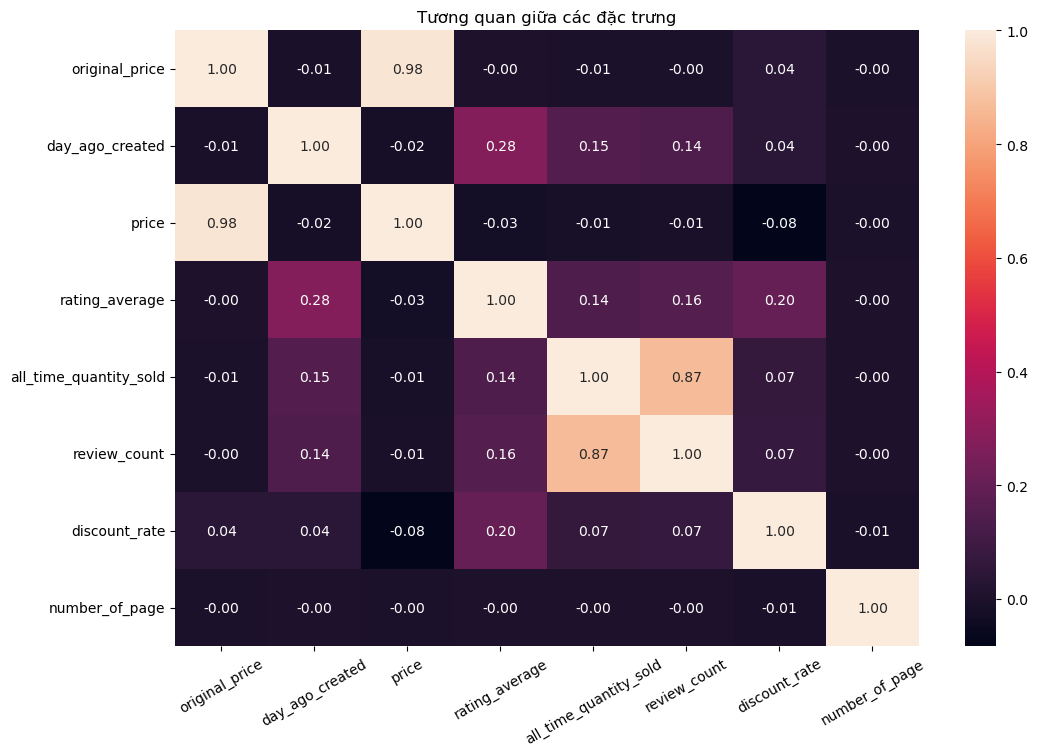

In [417]:
plt.figure(figsize=(12,8))
sns.heatmap(df[set(numeric_cols) - {'id', 'sku'}].corr(), annot=True, fmt='.2f')
plt.xticks(rotation=30)
plt.title('Tương quan giữa các đặc trưng')
plt.show()

In [418]:
cate_cols = set(df.columns) - set(numeric_cols)
cate_profiles = {'missing_ratio': df[cate_cols].isna().sum() * 100.0/len(df[cate_cols]),
               #   'zero_values_ratio':  df[cate_cols].eq(0).sum(axis=1) * 100.0/len(df[cate_cols]),
                      'num_diff_vals': df[cate_cols].nunique(dropna=True),
                      'diff_vals': df[cate_cols].stack(dropna=True).groupby(level=[1]).unique(),
                      }
cate_col_profiles_df = pd.DataFrame(cate_profiles).transpose()
cate_col_profiles_df

,authors,book_cover,categories,dich_gia,dimensions,edition,inventory_type,luu_y,manufacturer,name,productset_group_name,publication_date,publisher_vn,short_url
missing_ratio,48.804125,35.358555,0.0,85.686774,82.744197,96.931105,0.0,99.995858,0.550827,0.0,0.0,61.158394,0.035203,0.0
num_diff_vals,9094,17,100,3110,1051,364,3,1,168,44424,101,10896,852,48288
diff_vals,"[Trần Đặng Đăng Khoa, Trần Hồng Ngọc, Lê Quang...","[Bìa mềm, Bìa Da, Bìa cứng, Bìa gập, Bìa rời, ...","[Du ký, Light novel, Phê Bình - Lý Luận Văn Họ...","[Khánh Vân, Phan Quang, Nguyễn Thị Bạch Tuyết,...","[13 x 20, 14,5 x 20,5 cm, 13.5 x 20.5 cm, 15 x...","[bìa mềm, BÌA MỀM, Tiếng Việt, Tặng kèm bookma...","[instock, backorder, preorder]",[Sách không còn kèm CD mà thay bằng ứng dụng t...,"[NXB Trẻ, Nhà Xuất Bản Lao Động, Nhà Xuất Bản ...",[1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàn...,[Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Du...,"[2022-11-10 00:00:00, 2022-11-11 17:44:46, 202...","[NXB Trẻ, Chibooks, Văn Lang, Edibooks, NXB Ph...",[https://tiki.vn/product-p204317934.html?spid=...


In [419]:
df['dimensions'][df['dimensions'].str.contains('(\d+).?[xX].?(\d+).?[(cm)(CM)]?', na=False)].loc[1100]

'13x18x2.5 cm'

In [420]:
df['dimensions'].str.extractall('(\d+[.,]?\d+.?.?[xX]?.?.?\d+[.,]?\d+)').loc[39592]
df['dimensions'].str.extractall(r'(\d+.?,?\d+).?x.?(\d+.?,?\d+)[.?x.?(\d+.?,?\d+)]?')#['dimensions']

,,0,1
,match,,
0,0,13,20
2,0,"14,5","20,5"
6,0,13.5,20.5
11,0,"14,5","20,5"
14,0,15,23
...,...,...,...
47966,0,14,14
47967,0,14.5,20.5
48087,0,15,23


In [421]:
dimen = pd.DataFrame(df['dimensions'][df['dimensions'].notna()].str.replace('[a-zA-Z]', ' ').str.replace(',', '.').str.split())
# dimen['area'] = dimen['dimensions'].apply(lambda x: list(map(float, x))).apply(lambda x: np.prod(x))
dimen.loc[39592]

dimensions    [<, =", /, "><!--, {, :, 1, #, ;}, {, -, -, :,...
Name: 39592, dtype: object

In [422]:
cate_col_profiles_df.loc['diff_vals', 'categories']

array(['Du ký', 'Light novel', 'Phê Bình - Lý Luận Văn Học',
       'Phóng sự - Ký sự - Bút ký', 'Tác phẩm kinh điển', 'Thơ',
       'Tiểu sử - Hồi ký', 'Tiểu Thuyết',
       'Truyện Giả tưởng - Huyền Bí - Phiêu Lưu', 'Tranh Truyện',
       'Truyện cổ tích - Ngụ ngôn', 'Truyện cười', 'Truyện dài',
       'Bài học kinh doanh', 'Truyện đam mỹ', 'Truyện kiếm hiệp',
       'Truyện kinh dị', 'Truyện ngắn - Tản văn - Tạp Văn',
       'Truyện ngôn tình', 'Truyện trinh thám', 'Ca dao - Tục ngữ',
       'Sách ảnh', 'Sách doanh nhân', 'Sách khởi nghiệp',
       'Sách kinh tế học', 'Sách kỹ năng làm việc',
       'Sách Marketing - Bán hàng ', 'Sách quản trị, lãnh đạo',
       'Sách quản trị nhân lực', 'Sách tài chính, kế toán',
       'Sách tài chính, tiền tệ', 'Đạo đức - Kỹ năng sống',
       'Kiến thức - Bách khoa', 'Tô màu - Luyện chữ  ', 'Truyện cổ tích',
       'Truyện kể cho bé', 'Truyện tranh Ehon', 'Truyện tranh thiếu nhi',
       'Văn học thiếu nhi', 'Sách tư duy - Kỹ năng sống',
       

Chọn ra các features phù hợp/ có ảnh hưởng đến yêu cầu bài toán làm đầu vào cho mô hình 

In [423]:
cols = ['original_price', 'discount_rate',
       'rating_average', 'review_count', 'day_ago_created',
       'all_time_quantity_sold', 'number_of_page']
# Thêm một vài cột categories có ý nghĩa đối với output
cate = ['book_cover', 'categories', 'inventory_type', 'manufacturer', 'publication_date']
cols.extend(cate)

Xem qua kiểu dữ liệu của các cột

In [424]:
df[cols].dtypes

original_price              int64
discount_rate               int64
rating_average            float64
review_count                int64
day_ago_created             int64
all_time_quantity_sold      int64
number_of_page              int64
book_cover                 object
categories                 object
inventory_type             object
manufacturer               object
publication_date           object
dtype: object

In [425]:
df[['categories', 'inventory_type', 'manufacturer']] = df[['categories', 'inventory_type', 'manufacturer']].astype(str)
df[['categories', 'inventory_type', 'manufacturer']]

,categories,inventory_type,manufacturer
0,Du ký,instock,NXB Trẻ
1,Du ký,backorder,NXB Trẻ
2,Du ký,instock,Nhà Xuất Bản Lao Động
3,Du ký,backorder,Nhà Xuất Bản Hồng Đức
4,Du ký,backorder,NXB Trẻ
...,...,...,...
48286,Thể Dục - Thể Thao,backorder,Nhà Xuất Bản Hà Nội
48287,Thể Dục - Thể Thao,backorder,NXB Trẻ
48288,Thể Dục - Thể Thao,backorder,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội
48289,Thể Dục - Thể Thao,backorder,Nhà Xuất Bản Thể Thao Và Du Lịch


Cột `publication_date` đang có kiểu dữ liệu là object, ta cũng cần chuyển về datetime cho phù hợp

In [426]:
df['publication_date'] = pd.to_datetime(df.publication_date, format = "%Y-%m-%d %H:%M:%S", errors = "coerce")

Có lẽ ta không cần cột này trong đầu vào của mô hình vì cột `day_ago_created` đã có ý nghĩa tương tự

In [427]:
cols.remove('publication_date')

**Xem một vài phân bố của các đặc trưng, từ đó giúp ta quan sát outliers, độ tập trung của dữ liệu**

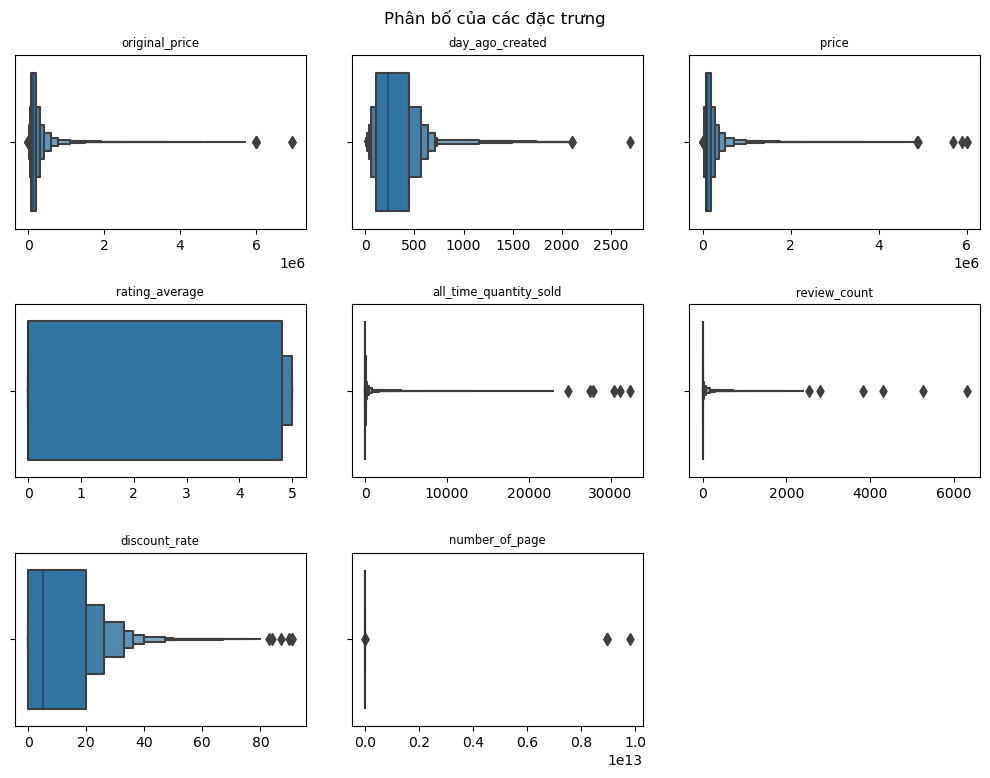

In [428]:
# df_cont = df.select_dtypes([int,float]) 
numeric_df = df[set(numeric_cols) - {'id', 'sku'}]

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Phân bố của các đặc trưng')
for i,col in enumerate(numeric_df.columns, 1): 
    ax = plt.subplot(4,3,i) 
    sns.boxenplot(data = numeric_df, x=numeric_df[col]) 
    plt.xlabel(None)
    plt.title(col, fontsize='small')
    plt.tight_layout(w_pad=3) 

plt.show() 

- <font color=bone>*original_price*</font> và <font color=bone>*price*</font> có phân bố khá giống nhau, có vài điểm outliers khá lớn
- <font color=bone>*day_ago_created*</font> thì phân bố tập trung trong khoảng 0-500 và giảm dần về 2000
- <font color=bone>*rating_average*</font> phân bố khá đồng đều từ 0 đến 5
- <font color=bone>*all_time_quantity_sold*</font> phân bố chủ yếu ở giá trị 0, xấp xỉ 0 và rải rác từ 0 đến hơn 30000
- <font color=bone>*review_count*</font> cũng tương tự, tuy nhiên nằm rải rác từ 0 đến hơn 6000
- <font color=bone>*discount_rate*</font> chủ yếu phân bố từ 0-40 và thưa thớt ở các giá trị rate cao hơn
- Riêng với <font color=bone>*number_of_page*</font> có outlier khá "khủng" nên ta sẽ xử lý riêng và vẽ lại biểu đồ của cột này

14707    9786049223471
27552    8935220568431
39354    8935075952928
43228    8935075950900
43337           660000
44942           570000
44906           540000
37469           432000
39224           392000
1195            378000
46357           378000
11559           362000
14961           300000
43246           290000
43141           268000
1397            224000
42502           220000
41933           212000
7623            192000
43684           192000
28253           154000
1024            152000
3213            148000
27145           138000
38919           136000
46398           124000
22315           123000
42862           119000
27899           115000
48002            98000
Name: number_of_page, dtype: int64


(0.0, 10000.0)

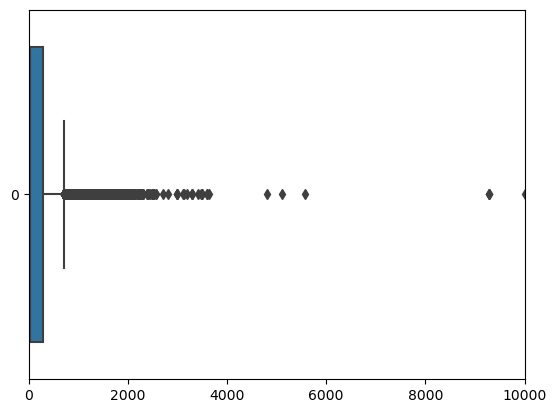

In [455]:
# flierprops = dict(marker='o', markersize=5)
print(numeric_df['number_of_page'].sort_values(ascending=False)[:30])
sns.boxplot(data = numeric_df['number_of_page'].reset_index(drop=True)
              , orient='h') 
plt.xlim(0, 1e4)

**Các cột có giá trị thiếu hay không? Nếu thiếu thì xử lý như thế nào?**

In [430]:
df[cols].isna().sum()

original_price                0
discount_rate                 0
rating_average                0
review_count                  0
day_ago_created               0
all_time_quantity_sold        0
number_of_page                0
book_cover                17075
categories                    0
inventory_type                0
manufacturer                  0
dtype: int64

Cột `book_cover` thiếu khá nhiều, ta sẽ xem qua các giá trị của cột này

In [431]:
df['book_cover'].value_counts()

Bìa mềm                                     27766
Bìa cứng                                     2922
Bìa gập                                       366
Bìa Da                                         43
Bìa rời                                        26
B Format Paperback                             22
Bìa Da Công Nghiệp Microfiber                  21
Box                                            14
Boxset                                         12
Tùy chọn phiên bản bìa cứng hoặc bìa mềm        9
Paperback                                       7
Board book                                      2
Mix Media Pack                                  2
Jigsaw box                                      1
Counterpack holds 48 Mini Activity Books        1
B-format Paperback                              1
Hardcover                                       1
Name: book_cover, dtype: int64

Ngoài ra, cột <font color=bone>number_of_page</font> chứa các giá trị 0 cũng khá vô lý (cuốn sách có 0 trang?), một suy đoán cho những giá trị này có thể là do thiếu dữ liệu về số trang nên sẽ mặc định là 0. 
- Có thể phải bỏ các dòng có giá trị này để tránh thêm vào điểm dữ liệu bất hợp lý?
- Một cách khác là điền vào các giá trị theo mật độ xuất hiện của các giá trị đã biết?

In [432]:
df[df['book_cover'].isna()].sample(5)

,id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,review_count,inventory_type,productset_group_name,day_ago_created,categories,all_time_quantity_sold,authors,publisher_vn,publication_date,dimensions,manufacturer,number_of_page,dich_gia,edition,luu_y
7525,197626882,9125916195265,Cuốn sách: Nam Thiên Kì Đàm,https://tiki.vn/product-p197626882.html?spid=1...,NaN,91000,96000,5,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Tru...,80,Truyện kinh dị,0,NaN,BeBooks,NaT,NaN,Nhà Xuất Bản Thanh Niên,0,NaN,NaN,NaN
7311,197637978,4871986640172,Thiên Long Bát Bộ ( Trọn Bộ 3 Cuốn) - Phương Nam,https://tiki.vn/product-p197637978.html?spid=1...,NaN,980000,980000,0,5.0,1,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Tru...,79,Truyện kiếm hiệp,5,Kim Dung,Cty Bán Lẻ Phương Nam,2016-09-06 15:14:01,NaN,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội,0,NaN,NaN,NaN
38480,175087238,7179455581771,Giải Pháp Phát Triển Bền Vững Ngành Công Nghiệ...,https://tiki.vn/product-p175087238.html?spid=1...,NaN,60000,60000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Khoa Học - ...,232,Sách Khoa Học - Kỹ Thuật,1,NaN,Công ty Cổ Phần Sách Đại Học Dạy Nghề,NaT,NaN,Nhà Xuất Bản Giáo Dục Việt Nam,0,NaN,NaN,NaN
37989,165123958,1902841154765,Các mô hình cơ bản trong phân tích và thiết kế...,https://tiki.vn/product-p165123958.html?spid=1...,NaN,66300,78000,15,4.5,4,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Khoa Học - ...,281,Sách Khoa Học - Kỹ Thuật,16,NaN,NXB Thông Tin Và truyền Thông,NaT,NaN,Nhà Xuất Bản Thông Tin Và Truyền Thông,0,NaN,NaN,NaN
2344,182300634,4744777097576,Sác-Thép đã tôi thế đấy,https://tiki.vn/product-p182300634.html?spid=1...,NaN,129000,129000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Tác...,108,Tác phẩm kinh điển,0,NaN,Đinh Tị,NaT,NaN,Nhà Xuất Bản Văn Học,0,NaN,NaN,NaN


Thay các giá trị 0 thành nan để phục vụ cho giai đoạn xử lý missing value 

In [433]:
df['number_of_page'].replace(0, np.nan, inplace=True)

In [434]:
features = df[cols].copy()

#### **Phân chia tập train/val/test**

In [462]:
x_df = df[set(df.columns) - {'discount_rate'}]
y_df = df['discount_rate']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=5) # Tách tập test/train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=5) # Tách tập train/val từ tập train


(9659,)

#### **Pipeline cho bước tiền xử lý**

In [463]:
# df['book_cover'].fillna('Không có bìa', inplace=True)
cate = [ 'book_cover', 'categories','inventory_type', 'manufacturer']
nume = ['original_price', 'discount_rate', 'rating_average', 'review_count', 'day_ago_created','all_time_quantity_sold',
        'number_of_page']
cate_transformer = Pipeline(steps= [('imputer', SimpleImputer(strategy='most_frequent')),
                               ('OneHotEncoder', OneHotEncoder())])

nume_transfomer = Pipeline(steps= [('imputer', KNNImputer(n_neighbors=10)),
                                   ])

preprocessor = ColumnTransformer(transformers=[('cate_transformer', cate_transformer, cate),
                                                       ('nume_transfomer',nume_transfomer, nume),
                                                       'nume_scaler_'])

In [464]:
features

,original_price,discount_rate,rating_average,review_count,day_ago_created,all_time_quantity_sold,number_of_page,book_cover,categories,inventory_type,manufacturer
0,325000,19,5.0,55,29,666,NaN,17,3,1,45
1,325000,21,0.0,0,22,3,778.0,9,3,0,45
2,129000,26,4.8,5,122,65,216.0,9,3,1,75
3,325000,10,0.0,0,22,2,776.0,9,3,0,66
4,325000,10,0.0,0,25,1,NaN,17,3,0,45
...,...,...,...,...,...,...,...,...,...,...,...
48286,99000,0,0.0,0,95,0,NaN,17,66,0,63
48287,145000,0,0.0,0,124,0,255.0,9,66,0,45
48288,278000,0,0.0,0,209,0,NaN,17,66,0,121
48289,109000,15,0.0,0,211,0,NaN,9,66,0,92


## **5. Huấn luyện mô hình**

#### **Cross validation**

In [ ]:
# Xác định KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Xác định metric cho mô hình
metric = make_scorer(fbeta)

comp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('mlpregressor')])